In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ---------------------------------------
# 1. LOAD MAIN DATA (2025 combined dataset)
# ---------------------------------------
final_df = pd.read_csv("../data/final_liberta.csv", encoding="latin-1")

# Convert Date to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce')

# Drop rows with no date
final_df = final_df.dropna(subset=['Date'])

# Sort chronologically (VERY IMPORTANT)
final_df = final_df.sort_values(by="Date").reset_index(drop=True)

In [3]:
# ---------------------------------------
# 2. FILTER TEAMS FOR 2025 CAMPAIGN
# ---------------------------------------
pal2025 = final_df[final_df['Team'] == 'Palmeiras'].copy()
fla2025 = final_df[final_df['Team'] == 'Flamengo'].copy()

# Compute cumulative xG
pal2025['xG_cum'] = pal2025['xG'].cumsum()
fla2025['xG_cum'] = fla2025['xG'].cumsum()

In [4]:
# ---------------------------------------
# 3. LOAD HISTORICAL CSVs
# ---------------------------------------
pal2020 = pd.read_csv("../data/Palmeiras_2020.csv", encoding='latin-1')
pal2021 = pd.read_csv("../data/Palmeiras_2021.csv", encoding='latin-1')
fla2019 = pd.read_csv("../data/Flamengo_2019.csv", encoding='latin-1')
fla2022 = pd.read_csv("../data/Flamengo_2022.csv", encoding='latin-1')

In [5]:
# ---------------------------------------
# 4. FIX DATES + SORT HISTORICAL DATA
# ---------------------------------------
for df in [pal2020, pal2021, fla2019, fla2022]:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)
    df.sort_values(by="Date", inplace=True)
    df.reset_index(drop=True, inplace=True)

In [23]:
# ---------------------------------------
# 5. COMPUTE CUMULATIVE xG FOR HISTORICAL DATA
# ---------------------------------------
pal2020['xG_cum'] = pal2020['xG'].cumsum()
pal2021['xG_cum'] = pal2021['xG'].cumsum()
fla2019['xG_cum'] = fla2019['xG'].cumsum()
fla2022['xG_cum'] = fla2022['xG'].cumsum()

# Clean any fully empty rows
fla2022 = fla2022.dropna(how="all")

In [ ]:
pal2025.columns

In [41]:
columns_to_check = ['Date', 'Round', 'Venue', 'Result', 'GF', 'GA', 'Team']
pal2025 = pal2025.drop_duplicates(subset=columns_to_check, keep='first')
fla2025 = fla2025.drop_duplicates(subset=columns_to_check, keep='first')

In [43]:
pal2025 = pal2025.drop('xG_cum', axis=1)
fla2025 = fla2025.drop('xG_cum', axis=1)

In [44]:
pal2025['xG_cum'] = pal2025['xG'].cumsum()
fla2025['xG_cum'] = fla2025['xG'].cumsum()

In [49]:
pal2025['Date'] = pd.to_datetime(pal2025['Date'], errors='coerce')
pal2025 = pal2025.sort_values(['Team','Date']).reset_index(drop=True)

fla2025['Date'] = pd.to_datetime(fla2025['Date'], errors='coerce')
fla2025 = fla2025.sort_values(['Team','Date']).reset_index(drop=True)

In [54]:
fla2025= fla2025.drop(index=9)

In [55]:
fla2025.head(13)

,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Team,xG_cum
0,2025-04-03,Group stage,Away,W,1,0,ve Dep TÃ¡chira,1.4,0.2,61.0,Flamengo,1.4
1,2025-04-09,Group stage,Home,L,1,2,ar Cen. CÃ³rdobaâSdE,1.3,1.5,77.0,Flamengo,2.7
2,2025-04-22,Group stage,Away,D,0,0,LDU,0.6,1.0,56.0,Flamengo,3.3
3,2025-05-07,Group stage,Away,D,1,1,Cen. CÃ³rdoba,0.9,0.9,55.0,Flamengo,4.2
4,2025-05-15,Group stage,Home,W,2,0,LDU,1.4,0.2,62.0,Flamengo,5.6
5,2025-05-28,Group stage,Home,W,1,0,ve Dep TÃ¡chira,1.5,0.4,62.0,Flamengo,7.1
6,2025-08-13,Round of 16,Home,W,1,0,Internacional,0.8,0.1,65.0,Flamengo,7.9
7,2025-08-20,Round of 16,Away,W,2,0,Internacional,2.1,0.4,56.0,Flamengo,10.0
8,2025-09-18,Quarter-finals,Home,W,2,1,Estudiantes,1.9,0.5,56.0,Flamengo,11.9
10,2025-09-25,Quarter-finals,Away,L,0,1,Estudiantes,0.7,0.6,64.0,Flamengo,13.3


In [13]:
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce')
final_df = final_df.sort_values(['Team','Date']).reset_index(drop=True)

# criar cumulative xG
#final_df['xG_cum'] = final_df.groupby('Team')['xG'].cumsum()

In [14]:
FV_GOLD = "#D4AF37"
FV_GOLD_DARK = "#B8860B"
FV_GREEN = "#16a34a"        
FV_NAVY  = "#142233"        
FV_YELLOW = "#F9C80E"
FV_GRAY   = "#CCCCCC"
FV_WHITE  = "#FFFFFF"
FV_RED = "#F52727"

In [29]:
print(final_df.columns)

Index(['Date', 'Round', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA',
       'Poss', 'xG_cum'],
      dtype='object')


In [187]:
fla2025_clean = fla2025[['Date', 'Round', 'Venue', 'Result', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Team']].copy()b

In [189]:
fla2025_clean['xG_cum'] = fla2025_clean['xG'].cumsum()

In [190]:
fla2025_clean.head(13)

,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Team,xG_cum
0,2025-04-03,Group stage,Away,W,1,0,ve Dep TÃ¡chira,1.4,0.2,61.0,Flamengo,1.4
1,2025-04-09,Group stage,Home,L,1,2,ar Cen. CÃ³rdobaâSdE,1.3,1.5,77.0,Flamengo,2.7
2,2025-04-22,Group stage,Away,D,0,0,LDU,0.6,1.0,56.0,Flamengo,3.3
3,2025-05-07,Group stage,Away,D,1,1,Cen. CÃ³rdoba,0.9,0.9,55.0,Flamengo,4.2
4,2025-05-15,Group stage,Home,W,2,0,LDU,1.4,0.2,62.0,Flamengo,5.6
5,2025-05-28,Group stage,Home,W,1,0,ve Dep TÃ¡chira,1.5,0.4,62.0,Flamengo,7.1
6,2025-08-13,Round of 16,Home,W,1,0,Internacional,0.8,0.1,65.0,Flamengo,7.9
7,2025-08-20,Round of 16,Away,W,2,0,Internacional,2.1,0.4,56.0,Flamengo,10.0
8,2025-09-18,Quarter-finals,Home,W,2,1,Estudiantes,1.9,0.5,56.0,Flamengo,11.9
10,2025-09-25,Quarter-finals,Away,L,0,1,Estudiantes,0.7,0.6,64.0,Flamengo,12.6


In [207]:
pal2025.to_csv('pal2022.csv', encoding='latin-1')

In [130]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set global style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.facecolor'] = FV_NAVY
plt.rcParams['figure.facecolor'] = FV_NAVY
plt.rcParams['text.color'] = FV_WHITE
plt.rcParams['axes.labelcolor'] = FV_WHITE
plt.rcParams['xtick.color'] = FV_WHITE
plt.rcParams['ytick.color'] = FV_WHITE
plt.rcParams['axes.edgecolor'] = FV_GRAY
plt.rcParams['grid.color'] = FV_GRAY
plt.rcParams['grid.alpha'] = 0.2

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# --------------------------
# MAIN LINE
# --------------------------
ax.plot(
    pal2025['Date'],
    pal2025['xG_cum'],
    color=FV_GREEN,
    linewidth=3.5,
    marker='o',
    markersize=8,
    markerfacecolor=FV_GREEN,
    markeredgecolor=FV_WHITE,
    markeredgewidth=1.5,
    label='xG Acumulado',
    zorder=3
)

# Add data points labels for key matches (optional - every 3rd match)
for i, (date, xg) in enumerate(zip(pal2025['Date'], pal2025['xG_cum'])):
    if i % 3 == 0:  # Label every 3rd point to avoid clutter
        ax.annotate(
            f'{xg:.1f}',
            xy=(date, xg),
            xytext=(0, 10),
            textcoords='offset points',
            ha='center',
            fontsize=9,
            color=FV_GOLD,
            weight='bold',
            alpha=0.9
        )

# --------------------------
# STYLING
# --------------------------
# Grid
ax.grid(True, linestyle='--', alpha=0.2, zorder=0)

# Axes labels
ax.set_xlabel('Data', fontsize=12, fontweight='bold', color=FV_WHITE)
ax.set_ylabel('xG Acumulado', fontsize=12, fontweight='bold', color=FV_WHITE)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45, ha='right')

min_xg = pal2025['xG_cum'].min()
ax.set_ylim(bottom=min_xg - 0.3)  

# Add legend
ax.legend(
    loc='upper left',
    fontsize=10,
    facecolor=FV_NAVY,
    edgecolor=FV_GOLD,
    labelcolor=FV_WHITE,
    framealpha=0.9
)

# --------------------------
# TITLE & SUBTITLE
# --------------------------
fig.text(
    0.05, 0.96, 
    "Palmeiras na Libertadores 2025: Campanha Histórica em Expected Goals",
    fontsize=18,
    fontweight="bold",
    color=FV_WHITE,
    ha="left"
)

fig.text(
    0.05, 0.925,
    "Ritmo de criação de chances entre os melhores finalistas desde 2017",
    fontsize=13,
    color=FV_GOLD,
    ha="left",
    style='italic'
)

# Example: Highlight a key victory
key_match_date = pd.Timestamp('2025-09-24')  # QF second leg
key_match_xg = pal2025[pal2025['Date'] == key_match_date]['xG_cum'].values[0]

ax.annotate(
    'QF vs River Plate',
    xy=(key_match_date, key_match_xg),
    xytext=(3, 43),
    textcoords='offset points',
    ha='left',
    fontsize=10,
    color=FV_GOLD,
    weight='bold',
    bbox=dict(boxstyle='round,pad=0.5', facecolor=FV_NAVY, 
              edgecolor=FV_GOLD, linewidth=1.5),
    arrowprops=dict(arrowstyle='->', color=FV_GOLD, lw=1.5)
)
# --------------------------
# FOOTER BRANDING
# --------------------------
fig.text(
    0.99, -0.03,
    '@FutebolViz',
    fontsize=13,
    color=FV_GOLD,
    ha='right',
    fontweight='bold',
    alpha=0.9
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.12)

# Save
#plt.savefig('palmeiras2025_xg_evolution.png', dpi=300, bbox_inches='tight', 
            #facecolor=FV_NAVY)
plt.show()

print("✅ Chart saved!")

IndentationError: unexpected indent (307092576.py, line 136)

Chart saved and optimized for Twitter wide format!


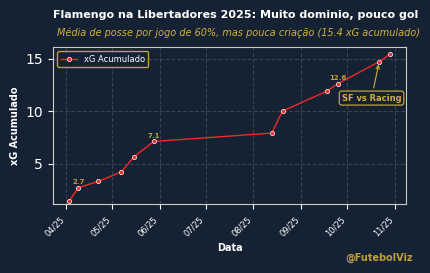

In [201]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np # Used for dummy data if needed

# TARGET TWITTER WIDE: 1200 x 675 pixels
DPI = 300
FIG_WIDTH_IN = 1200 / DPI # 4.0
FIG_HEIGHT_IN = 675 / DPI # 2.25


# Create figure with the new, scaled size
fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))



# --------------------------
# MAIN LINE 
# --------------------------
ax.plot(
    fla2025_clean['Date'],
    fla2025_clean['xG_cum'],
    color=FV_RED,
    linewidth=1.0,  # Scaled down from 3.5
    marker='o',
    markersize=3,   # Scaled down from 8
    markerfacecolor=FV_RED,
    markeredgecolor=FV_WHITE,
    markeredgewidth=0.5, # Scaled down from 1.5
    label='xG Acumulado',
    zorder=3
)

# Add data points labels (SCALED)
for i, (date, xg) in enumerate(zip(fla2025_clean['Date'], fla2025_clean['xG_cum'])):
    if i % 4 == 1:
        ax.annotate(
            f'{xg:.1f}',
            xy=(date, xg),
            xytext=(0, 3), # Scaled down from 10
            textcoords='offset points',
            ha='center',
            fontsize=5,   # Scaled down from 9
            color=FV_GOLD,
            weight='bold',
            alpha=0.9
        )

# --------------------------
# STYLING (SCALED)
# --------------------------
# Grid
ax.grid(True, linestyle='--', alpha=0.2, zorder=0)

# Axes labels (SCALED)
ax.set_xlabel('Data', fontsize=7, fontweight='bold', color=FV_WHITE) # Scaled from 12
ax.set_ylabel('xG Acumulado', fontsize=7, fontweight='bold', color=FV_WHITE) # Scaled from 12

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45, ha='right', fontsize=6) # Scaled from 10 (default)

# Y-axis scaling
min_xg = fla2025_clean['xG_cum'].min()
ax.set_ylim(bottom=min_xg - 0.3) 

# Add legend (SCALED)
ax.legend(
    loc='upper left',
    fontsize=6, # Scaled from 10
    facecolor=FV_NAVY,
    edgecolor=FV_GOLD,
    labelcolor=FV_WHITE,
    framealpha=0.9
)

# --------------------------
# TITLE & SUBTITLE (SCALED AND REPOSITIONED)
# --------------------------
# Increase y-coordinate slightly since tight_layout on small figures can push things
fig.text(
    0.08, 0.98,  
    "Flamengo na Libertadores 2025: Muito dominio, pouco gol",
    fontsize=8, 
    fontweight="bold",
    color=FV_WHITE,
    ha="left"
)

fig.text(
    0.09, 0.90, 
    "Média de posse por jogo de 60%, mas pouca criação (15.4 xG acumulado)",
    fontsize=7, 
    color=FV_GOLD,
    ha="left",
    style='italic'
)

key_match_date = pd.Timestamp('2025-10-22') 
# --------------------------
# KEY MATCH ANNOTATION (SCALED)
# --------------------------
# Check if date exists before annotating
if key_match_date in fla2025_clean['Date'].values:
    key_match_xg = fla2025_clean[fla2025_clean['Date'] == key_match_date]['xG_cum'].values[0]
    
    ax.annotate(
        'SF vs Racing',
        xy=(key_match_date, key_match_xg),
        xytext=(-27, -28), # Scaled from (-10, -50)
        textcoords='offset points',
        ha='left',
        fontsize=6, # Scaled from 10
        color=FV_GOLD,
        weight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor=FV_NAVY, # Scaled pad from 0.5
                  edgecolor=FV_GOLD, linewidth=0.8), # Scaled linewidth
        arrowprops=dict(arrowstyle='->', color=FV_GOLD, lw=0.8) # Scaled linewidth
    )
# else branch remains the same

# --------------------------
# FOOTER BRANDING (SCALED)
# --------------------------
fig.text(
    0.98, -0.10, # Moved from -0.02 to 0.0 to stay within tight_layout
    '@FutebolViz',
    fontsize=7, # Scaled from 13
    color=FV_GOLD,
    ha='right',
    fontweight='bold',
    alpha=0.9
)

# Adjust layout for the smaller figure
plt.tight_layout()
# Note: Since we used fig.text, we often need to manually adjust the top margin
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.08)

# Save
plt.savefig(
    'flamengo_xg_evolution_twitter_wide.png',
    dpi=DPI, 
    bbox_inches='tight',
    facecolor=fig.get_facecolor()
)
# plt.show()
print("Chart saved and optimized for Twitter wide format!")

Chart saved and optimized for Twitter wide format!


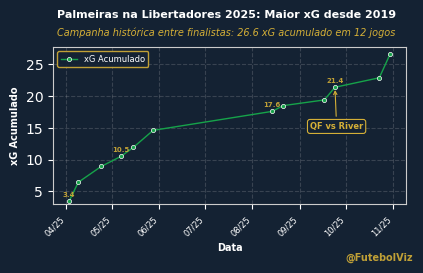

In [167]:
# TARGET TWITTER WIDE: 1200 x 675 pixels
DPI = 300
FIG_WIDTH_IN = 1200 / DPI # 4.0
FIG_HEIGHT_IN = 675 / DPI # 2.25


# Create figure with the new, scaled size
fig, ax = plt.subplots(figsize=(FIG_WIDTH_IN, FIG_HEIGHT_IN))



# --------------------------
# MAIN LINE 
# --------------------------
ax.plot(
    pal2025['Date'],
    pal2025['xG_cum'],
    color=FV_GREEN,
    linewidth=1.0,  # Scaled down from 3.5
    marker='o',
    markersize=3,   # Scaled down from 8
    markerfacecolor=FV_GREEN,
    markeredgecolor=FV_WHITE,
    markeredgewidth=0.5, # Scaled down from 1.5
    label='xG Acumulado',
    zorder=3
)

# Add data points labels (SCALED)
for i, (date, xg) in enumerate(zip(pal2025['Date'], pal2025['xG_cum'])):
    if i % 3 == 0:
        ax.annotate(
            f'{xg:.1f}',
            xy=(date, xg),
            xytext=(0, 3), # Scaled down from 10
            textcoords='offset points',
            ha='center',
            fontsize=5,   # Scaled down from 9
            color=FV_GOLD,
            weight='bold',
            alpha=0.9
        )

# --------------------------
# STYLING (SCALED)
# --------------------------
# Grid
ax.grid(True, linestyle='--', alpha=0.2, zorder=0)

# Axes labels (SCALED)
ax.set_xlabel('Data', fontsize=7, fontweight='bold', color=FV_WHITE) # Scaled from 12
ax.set_ylabel('xG Acumulado', fontsize=7, fontweight='bold', color=FV_WHITE) # Scaled from 12

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45, ha='right', fontsize=6) # Scaled from 10 (default)

# Y-axis scaling
min_xg = pal2025['xG_cum'].min()
ax.set_ylim(bottom=min_xg - 0.5) 

# Add legend (SCALED)
ax.legend(
    loc='upper left',
    fontsize=6, # Scaled from 10
    facecolor=FV_NAVY,
    edgecolor=FV_GOLD,
    labelcolor=FV_WHITE,
    framealpha=0.9
)

# --------------------------
# TITLE & SUBTITLE (SCALED AND REPOSITIONED)
# --------------------------
# Increase y-coordinate slightly since tight_layout on small figures can push things
fig.text(
    0.09, 0.98,  
    "Palmeiras na Libertadores 2025: Maior xG desde 2019",
    fontsize=8, 
    fontweight="bold",
    color=FV_WHITE,
    ha="left"
)

fig.text(
    0.09, 0.90, 
    "Campanha histórica entre finalistas: 26.6 xG acumulado em 12 jogos",
    fontsize=7, 
    color=FV_GOLD,
    ha="left",
    style='italic'
)

key_match_date = pd.Timestamp('2025-09-24') 
# --------------------------
# KEY MATCH ANNOTATION (SCALED)
# --------------------------
# Check if date exists before annotating
if key_match_date in pal2025['Date'].values:
    key_match_xg = pal2025[pal2025['Date'] == key_match_date]['xG_cum'].values[0]
    
    ax.annotate(
        'QF vs River',
        xy=(key_match_date, key_match_xg),
        xytext=(-18, -30), # Scaled from (-10, -50)
        textcoords='offset points',
        ha='left',
        fontsize=6, # Scaled from 10
        color=FV_GOLD,
        weight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor=FV_NAVY, # Scaled pad from 0.5
                  edgecolor=FV_GOLD, linewidth=0.8), # Scaled linewidth
        arrowprops=dict(arrowstyle='->', color=FV_GOLD, lw=0.8) # Scaled linewidth
    )

# --------------------------
# FOOTER BRANDING (SCALED)
# --------------------------
fig.text(
    0.98, -0.10, # Moved from -0.02 to 0.0 to stay within tight_layout
    '@FutebolViz',
    fontsize=7, # Scaled from 13
    color=FV_GOLD,
    ha='right',
    fontweight='bold',
    alpha=0.9
)

# Adjust layout for the smaller figure
plt.tight_layout()
# Note: Since we used fig.text, we often need to manually adjust the top margin
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.08)

# Save
plt.savefig(
    'palmeiras_xg_evolution_twitter_wide.png',
    dpi=DPI, 
    bbox_inches='tight',
    facecolor=fig.get_facecolor()
)
# plt.show()
print("Chart saved and optimized for Twitter wide format!")

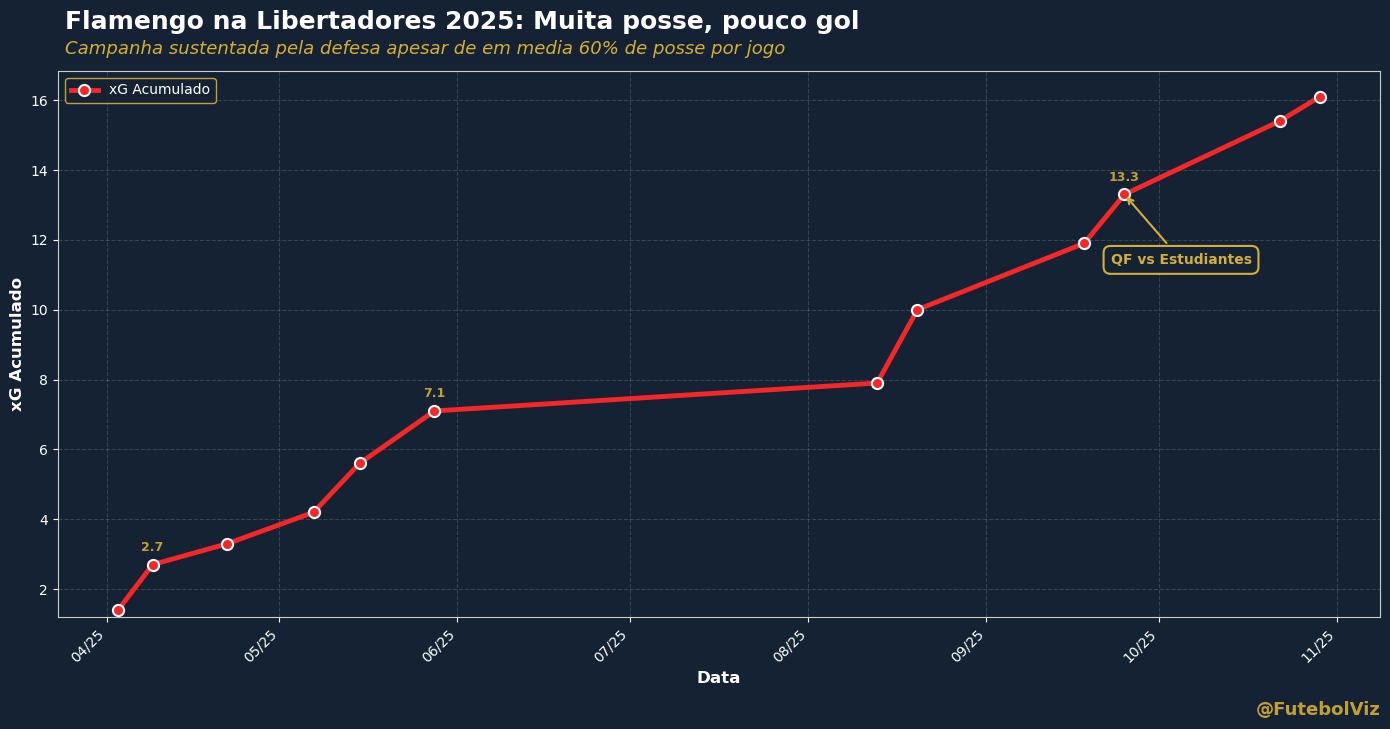

Chart saved!


In [84]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Set global style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.facecolor'] = FV_NAVY
plt.rcParams['figure.facecolor'] = FV_NAVY
plt.rcParams['text.color'] = FV_WHITE
plt.rcParams['axes.labelcolor'] = FV_WHITE
plt.rcParams['xtick.color'] = FV_WHITE
plt.rcParams['ytick.color'] = FV_WHITE
plt.rcParams['axes.edgecolor'] = FV_GRAY
plt.rcParams['grid.color'] = FV_GRAY
plt.rcParams['grid.alpha'] = 0.2

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# --------------------------
# MAIN LINE
# --------------------------
ax.plot(
    fla2025['Date'],
    fla2025['xG_cum'],
    color=FV_RED,
    linewidth=3.5,
    marker='o',
    markersize=8,
    markerfacecolor=FV_RED,
    markeredgecolor=FV_WHITE,
    markeredgewidth=1.5,
    label='xG Acumulado',
    zorder=3
)

# Add data points labels for key matches - FIXED: using fla not pal
for i, (date, xg) in enumerate(zip(fla2025['Date'], fla2025['xG_cum'])):
    if i % 4 == 1:  # Label every 3rd point to avoid clutter
        ax.annotate(
            f'{xg:.1f}',
            xy=(date, xg),
            xytext=(0, 10),
            textcoords='offset points',
            ha='center',
            fontsize=9,
            color=FV_GOLD,
            weight='bold',
            alpha=0.9
        )

# --------------------------
# STYLING
# --------------------------
# Grid
ax.grid(True, linestyle='--', alpha=0.2, zorder=0)

# Axes labels
ax.set_xlabel('Data', fontsize=12, fontweight='bold', color=FV_WHITE)
ax.set_ylabel('xG Acumulado', fontsize=12, fontweight='bold', color=FV_WHITE)

# Format x-axis dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45, ha='right')

# Y-axis scaling
min_xg = fla2025['xG_cum'].min()
ax.set_ylim(bottom=min_xg - 0.2)  

# Add legend
ax.legend(
    loc='upper left',
    fontsize=10,
    facecolor=FV_NAVY,
    edgecolor=FV_GOLD,
    labelcolor=FV_WHITE,
    framealpha=0.9
)

# --------------------------
# TITLE & SUBTITLE
# --------------------------
fig.text(
    0.05, 0.96, 
    "Flamengo na Libertadores 2025: Muita Posse, Pouco Gol!",
    fontsize=18,
    fontweight="bold",
    color=FV_WHITE,
    ha="left"
)

fig.text(
    0.05, 0.925,
    "Campanha sustentada pela defesa apesar de em media 60% de posse por jogo",
    fontsize=13,
    color=FV_GOLD,
    ha="left",
    style='italic'
)

# --------------------------
# KEY MATCH ANNOTATION
# --------------------------


key_match_date = pd.Timestamp('2025-09-25') 

# Check if date exists before annotating
if key_match_date in fla2025['Date'].values:
    key_match_xg = fla2025[fla2025['Date'] == key_match_date]['xG_cum'].values[0]
    
    ax.annotate(
        'QF vs Estudiantes',
        xy=(key_match_date, key_match_xg),
        xytext=(-10, -50),
        textcoords='offset points',
        ha='left',
        fontsize=10,
        color=FV_GOLD,
        weight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor=FV_NAVY, 
                  edgecolor=FV_GOLD, linewidth=1.5),
        arrowprops=dict(arrowstyle='->', color=FV_GOLD, lw=1.5)
    )
else:
    print(f"Date {key_match_date} not found in dataframe!")

# --------------------------
# FOOTER BRANDING
# --------------------------
fig.text(
    0.99, -0.02,
    '@FutebolViz',
    fontsize=13,
    color=FV_GOLD,
    ha='right',
    fontweight='bold',
    alpha=0.9
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.12)

# Save
#plt.savefig('flamengo_xg_evolution.png', 
            ## bbox_inches='tight', 
            #facecolor=FV_NAVY)
plt.show()

print("Chart saved!")

In [58]:
fla2025.head(13)

,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Team,xG_cum
0,2025-04-03,Group stage,Away,W,1,0,ve Dep TÃ¡chira,1.4,0.2,61.0,Flamengo,1.4
1,2025-04-09,Group stage,Home,L,1,2,ar Cen. CÃ³rdobaâSdE,1.3,1.5,77.0,Flamengo,2.7
2,2025-04-22,Group stage,Away,D,0,0,LDU,0.6,1.0,56.0,Flamengo,3.3
3,2025-05-07,Group stage,Away,D,1,1,Cen. CÃ³rdoba,0.9,0.9,55.0,Flamengo,4.2
4,2025-05-15,Group stage,Home,W,2,0,LDU,1.4,0.2,62.0,Flamengo,5.6
5,2025-05-28,Group stage,Home,W,1,0,ve Dep TÃ¡chira,1.5,0.4,62.0,Flamengo,7.1
6,2025-08-13,Round of 16,Home,W,1,0,Internacional,0.8,0.1,65.0,Flamengo,7.9
7,2025-08-20,Round of 16,Away,W,2,0,Internacional,2.1,0.4,56.0,Flamengo,10.0
8,2025-09-18,Quarter-finals,Home,W,2,1,Estudiantes,1.9,0.5,56.0,Flamengo,11.9
10,2025-09-25,Quarter-finals,Away,L,0,1,Estudiantes,0.7,0.6,64.0,Flamengo,13.3


In [72]:
# 1. Overperformance
fla_goals_real = fla2025['GF'].sum()
fla_xg_total = fla2025['xG'].sum()
#fla_overperf = fla_goals_real - fla_xg_total

#print(f"Overperformance: {fla_overperf:.1f}")

# 2. Defensive xG
fla_xga_total = fla2025['xGA'].sum()
print(f"xGA total: {fla_xga_total:.1f}")

# 3. Possession average
fla_poss_avg = fla2025['Poss'].mean()
print(f"Posse média: {fla_poss_avg:.1f}%")

xGA total: 7.1
Posse média: 60.5%


In [73]:
# Convert GF to numeric first (in case it has strings)
fla2025['GF'] = pd.to_numeric(fla2025['GF'], errors='coerce')
fla2025['GA'] = pd.to_numeric(fla2025['GA'], errors='coerce')

# Now calculate
fla_goals_real = fla2025['GF'].sum()
fla_xg_total = fla2025['xG'].sum()
fla_overperf = fla_goals_real - fla_xg_total

print(f"Overperformance: {fla_overperf:.1f} gols")

# 2. Defensive xG
fla_xga_total = fla2025['xGA'].sum()
fla_ga_real = fla2025['GA'].sum()
defensive_overperf = fla_xga_total - fla_ga_real  # Positive = better than expected

print(f"xGA total: {fla_xga_total:.1f}")
print(f"Gols sofridos: {fla_ga_real}")
print(f"Defesa vs esperado: {defensive_overperf:+.1f} (positivo = defendeu melhor que o esperado)")

# 3. Possession average
fla_poss_avg = fla2025['Poss'].mean()
print(f"Posse média: {fla_poss_avg:.1f}%")

# 4. Summary
print("\n" + "="*50)
print("RESUMO FLAMENGO 2025:")
print("="*50)
print(f"Total de gols marcados: {fla_goals_real}")
print(f"xG total esperado: {fla_xg_total:.1f}")
print(f"Overperformance ofensiva: {fla_overperf:+.1f}")
print(f"Posse média: {fla_poss_avg:.1f}%")
print(f"Defesa vs xGA: {defensive_overperf:+.1f}")

Overperformance: -3.4 gols
xGA total: 7.1
Gols sofridos: 5
Defesa vs esperado: +2.1 (positivo = defendeu melhor que o esperado)
Posse média: 60.5%

RESUMO FLAMENGO 2025:
Total de gols marcados: 12
xG total esperado: 15.4
Overperformance ofensiva: -3.4
Posse média: 60.5%
Defesa vs xGA: +2.1


In [74]:
# Convert GF to numeric first (in case it has strings)
pal2025['GF'] = pd.to_numeric(pal2025['GF'], errors='coerce')
pal2025['GA'] = pd.to_numeric(pal2025['GA'], errors='coerce')

# Now calculate
pal_goals_real = pal2025['GF'].sum()
pal_xg_total = pal2025['xG'].sum()
pal_overperf = fla_goals_real - fla_xg_total

print(f"Overperformance: {pal_overperf:.1f} gols")

# 2. Defensive xG
pal_xga_total = pal2025['xGA'].sum()
pal_ga_real = pal2025['GA'].sum()
defensive_overperf = pal_xga_total - pal_ga_real  # Positive = better than expected

print(f"xGA total: {pal_xga_total:.1f}")
print(f"Gols sofridos: {pal_ga_real}")
print(f"Defesa vs esperado: {defensive_overperf:+.1f} (positivo = defendeu melhor que o esperado)")

# 3. Possession average
pal_poss_avg = pal2025['Poss'].mean()
print(f"Posse média: {pal_poss_avg:.1f}%")

# 4. Summary
print("\n" + "="*50)
print("RESUMO PALEMIRAS 2025:")
print("="*50)
print(f"Total de gols marcados: {pal_goals_real}")
print(f"xG total esperado: {pal_xg_total:.1f}")
print(f"Overperformance ofensiva: {pal_overperf:+.1f}")
print(f"Posse média: {pal_poss_avg:.1f}%")
print(f"Defesa vs xGA: {defensive_overperf:+.1f}")

Overperformance: -3.4 gols
xGA total: 8.8
Gols sofridos: 9
Defesa vs esperado: -0.2 (positivo = defendeu melhor que o esperado)
Posse média: 51.1%

RESUMO PALEMIRAS 2025:
Total de gols marcados: 30
xG total esperado: 26.6
Overperformance ofensiva: -3.4
Posse média: 51.1%
Defesa vs xGA: -0.2


In [205]:
df = pd.read_csv('fpal2025.csv')

,Unnamed: 0,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Team,xG_cum
0,0,2025-04-03,Group stage,Away,W,1,0,ve Dep Táchira,1.4,0.2,61.0,Flamengo,1.4
1,1,2025-04-09,Group stage,Home,L,1,2,ar Cen. Córdoba–SdE,1.3,1.5,77.0,Flamengo,2.7
2,2,2025-04-22,Group stage,Away,D,0,0,LDU,0.6,1.0,56.0,Flamengo,3.3
3,3,2025-05-07,Group stage,Away,D,1,1,Cen. Córdoba,0.9,0.9,55.0,Flamengo,4.2
4,4,2025-05-15,Group stage,Home,W,2,0,LDU,1.4,0.2,62.0,Flamengo,5.6
